In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Загрузка данных
df = pd.read_csv('yandex_top100.csv')


In [4]:
# 2. Очистка и подготовка данных
# Преобразуем track_len в секунды
def time_to_seconds(time_str):
    if pd.isna(time_str):
        return np.nan
    parts = list(map(int, time_str.split(':')))
    return parts[0] * 60 + parts[1]

df['duration_sec'] = df['track_len'].apply(time_to_seconds)

# Обработка числовых столбцов
numeric_cols = ['monthly_listens_total', 'artists_likes_total']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [5]:
## 3. Анализ данных
# Топ-10 самых популярных треков
top_songs = df.sort_values('monthly_listens_total', ascending=False).head(10)
print("\nТоп-10 самых популярных треков:")
display(top_songs[['name', 'artist(s)', 'monthly_listens_total']])

# Анализ по жанрам
genre_stats = df.groupby('genre').agg({
    'monthly_listens_total': ['count', 'sum', 'mean'],
    'duration_sec': 'mean',
    'chart': ['min', 'max']
}).sort_values(('monthly_listens_total', 'sum'), ascending=False)

print("\nСтатистика по жанрам:")
display(genre_stats)


Топ-10 самых популярных треков:


name                                         artist(s)  \
1   Плохая Девочка       ['Винтаж', 'ТРАВМА', 'SKIDRI', 'DVRKLXGHT']   
89         С тобой  ['Jakone', 'A.V.G', 'BAGARDI', 'Goro', 'Asatro']   
44            Зари                ['Andro', 'ELMAN', 'TONI', 'MONA']   
6     Не вспоминай           ['NILETTO', 'Олег Майами', 'Лёша Свик']   
7        Поспешили                               ['MACAN', 'Jakone']   
4    Где прошла ты                             ['Кравц', 'Гио Пика']   
30             IVL                              ['MACAN', 'SCIRENA']   
10           money                         ['By Индия', 'The Limba']   
5         По весне                             ['Jakone', 'SCIRENA']   
14      Она близко                                 ['A.V.G', 'Goro']   

    monthly_listens_total  
1                16677658  
89               13509502  
44               10805529  
6                 9595600  
7                 9094105  
4                 9058111  
30                8454285  
10                8014390  
5                 7249592  
14                6888389


Статистика по жанрам:


monthly_listens_total                           \
                                   count        sum          mean   
genre                                                               
русский рэп                           44  181475383  4.124441e+06   
русская поп-музыка                    39  172165551  4.414501e+06   
панк                                   7   30689647  4.384235e+06   
русский рок                            1    4805309  4.805309e+06   
электроника                            3    4686638  1.562213e+06   
поп                                    2    3492475  1.746238e+06   
хаус                                   1    3389073  3.389073e+06   
кавказская музыка                      1    2035200  2.035200e+06   
индастриал                             1    1840688  1.840688e+06   
гиперпоп                               1     903121  9.031210e+05   

                   duration_sec chart       
                           mean   min  max  
genre                                       
русский рэп          152.295455     2   98  
русская поп-музыка   172.743590     1  100  
панк                 223.857143    16   88  
русский рок          191.000000    22   22  
электроника          154.333333    50   99  
поп                  212.500000    26   53  
хаус                 252.000000    95   95  
кавказская музыка    175.000000    96   96  
индастриал           272.000000    87   87  
гиперпоп             145.000000    34   34

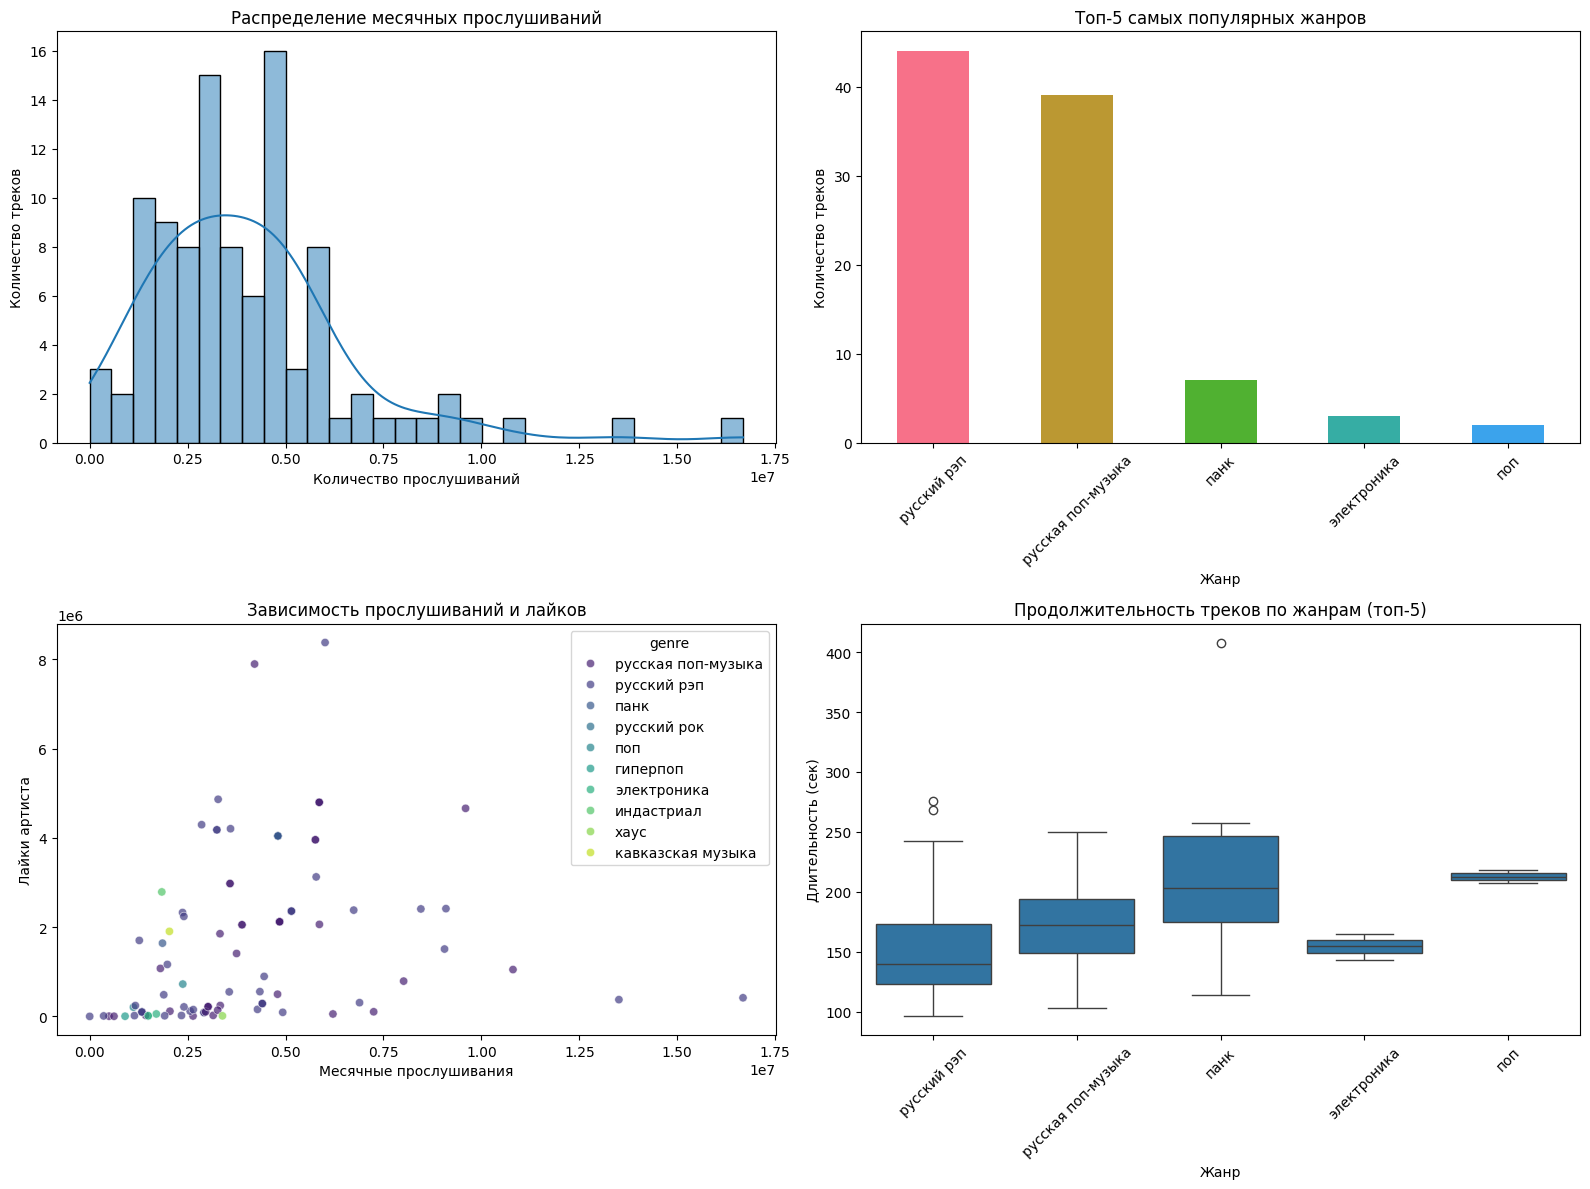

In [6]:
# 4. Визуализация
plt.figure(figsize=(16, 12))

# Распределение прослушиваний
plt.subplot(2, 2, 1)
sns.histplot(df['monthly_listens_total'], bins=30, kde=True)
plt.title('Распределение месячных прослушиваний')
plt.xlabel('Количество прослушиваний')
plt.ylabel('Количество треков')

# Топ жанров
plt.subplot(2, 2, 2)
top_genres = df['genre'].value_counts().nlargest(5)
top_genres.plot(kind='bar', color=sns.color_palette("husl"))
plt.title('Топ-5 самых популярных жанров')
plt.xlabel('Жанр')
plt.ylabel('Количество треков')
plt.xticks(rotation=45)

# Зависимость между прослушиваниями и лайками
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='monthly_listens_total', y='artists_likes_total', 
                hue='genre', palette='viridis', alpha=0.7)
plt.title('Зависимость прослушиваний и лайков')
plt.xlabel('Месячные прослушивания')
plt.ylabel('Лайки артиста')

# Продолжительность треков по жанрам
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='genre', y='duration_sec', 
           order=df['genre'].value_counts().nlargest(5).index)
plt.title('Продолжительность треков по жанрам (топ-5)')
plt.xlabel('Жанр')
plt.ylabel('Длительность (сек)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('yandex_music_analysis.png', dpi=120)
plt.show()


In [7]:
# 5. Дополнительный анализ с tqdm
# Расчет средней популярности для каждого артиста
artists_popularity = []
unique_artists = df['artist(s)'].unique()

for artist in tqdm(unique_artists, desc='Анализ артистов'):
    artist_data = df[df['artist(s)'] == artist]
    mean_popularity = artist_data['monthly_listens_total'].mean()
    artists_popularity.append({
        'artist': artist,
        'mean_listens': mean_popularity,
        'tracks_count': len(artist_data)
    })

artists_df = pd.DataFrame(artists_popularity)
top_artists = artists_df.sort_values('mean_listens', ascending=False).head(10)

print("\nТоп-10 артистов по средней популярности:")
display(top_artists)


Анализ артистов: 100%|███████████████████████| 74/74 [00:00<00:00, 3977.38it/s]


Топ-10 артистов по средней популярности:


artist  mean_listens  \
1        ['Винтаж', 'ТРАВМА', 'SKIDRI', 'DVRKLXGHT']    16677658.0   
65  ['Jakone', 'A.V.G', 'BAGARDI', 'Goro', 'Asatro']    13509502.0   
34                ['Andro', 'ELMAN', 'TONI', 'MONA']    10805529.0   
6            ['NILETTO', 'Олег Майами', 'Лёша Свик']     9595600.0   
7                                ['MACAN', 'Jakone']     9094105.0   
4                              ['Кравц', 'Гио Пика']     9058111.0   
25                              ['MACAN', 'SCIRENA']     8454285.0   
10                         ['By Индия', 'The Limba']     8014390.0   
5                              ['Jakone', 'SCIRENA']     7249592.0   
14                                 ['A.V.G', 'Goro']     6888389.0   

    tracks_count  
1              1  
65             1  
34             1  
6              1  
7              1  
4              1  
25             1  
10             1  
5              1  
14             1

In [8]:

# 6. Сохранение результатов
df.to_csv('yandex_top100_processed.csv', index=False)

print("- yandex_top100_processed.csv")
print("- yandex_music_analysis.png")


Анализ завершен! Результаты сохранены в файлы:
- yandex_top100_processed.csv
- yandex_music_analysis.png
